# Depth Visualizer Notebook

This notebook visualizes the R, G, B channels (and combined RGB) of an OpenEXR file, using a file-selection dialog and plotting each channel separately.

In [1]:
%matplotlib inline
import os
import tkinter as tk
from tkinter import filedialog

import OpenEXR
import Imath
import numpy as np
import matplotlib.pyplot as plt

# File-selection dialog
root = tk.Tk()
root.withdraw()
filename = filedialog.askopenfilename(
    title="Select an OpenEXR file",
    filetypes=[("OpenEXR files", "*.exr"), ("All files", "*.*")]
)
root.destroy()
print("Selected file:", filename)

Selected file: C:/Users/Tharu/VRFrameworkDatasetScene/Assets/Output/left_depth_exr/frame_0072.exr


R channel shape: (480, 640)
G channel shape: (480, 640)
B channel shape: (480, 640)


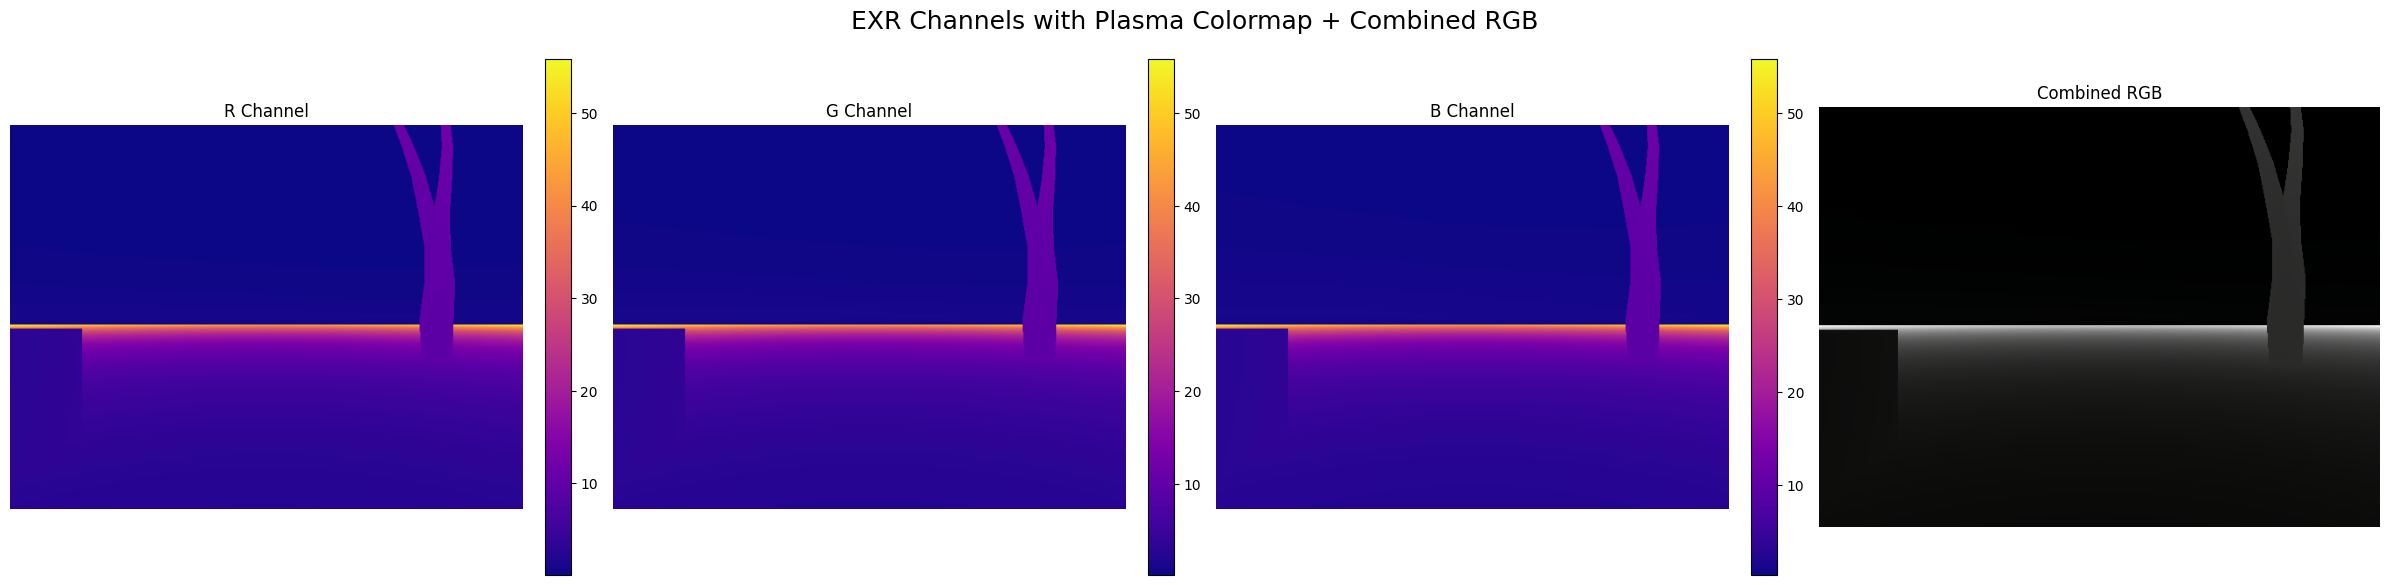

In [2]:
# Function definitions
def load_exr(filename):
    """Load R, G, B channels from an EXR into numpy arrays."""
    exr = OpenEXR.InputFile(filename)
    dw = exr.header()["dataWindow"]
    W = dw.max.x - dw.min.x + 1
    H = dw.max.y - dw.min.y + 1
    pt = Imath.PixelType(Imath.PixelType.FLOAT)

    channels = {}
    for c in ("R", "G", "B"):
        buf = exr.channel(c, pt)
        arr = np.frombuffer(buf, dtype=np.float32)
        channels[c] = arr.reshape(H, W)

    return channels

def normalize_channel(arr):
    """Scale a float32 array to [0,1] for display."""
    mn, mx = arr.min(), arr.max()
    return (arr - mn) / (mx - mn + 1e-8)

# Load channels and show shapes
channels = load_exr(filename)
for c in channels:
    print(f"{c} channel shape: {channels[c].shape}")

# Visualization
normed = {c: normalize_channel(channels[c]) for c in ("R", "G", "B")}
rgb = np.stack([normed[c] for c in ("R", "G", "B")], axis=-1)

fig, axs = plt.subplots(1, 4, figsize=(24, 6))
for i, c in enumerate(("R", "G", "B")):
    im = axs[i].imshow(channels[c], cmap="plasma")
    axs[i].set_title(f"{c} Channel")
    axs[i].axis("off")
    plt.colorbar(im, ax=axs[i], fraction=0.046, pad=0.04)

axs[3].imshow(rgb)
axs[3].set_title("Combined RGB")
axs[3].axis("off")

plt.suptitle("EXR Channels with Plasma Colormap + Combined RGB", fontsize=18)
plt.tight_layout()